In [1]:
train <- read.csv("train.csv")
features <- read.csv("features.csv")
stores <- read.csv("stores.csv")
test <- read.csv("test.csv")
library(ggplot2)
library(forecast)
library("smooth")

This is package "smooth", v1.9.0


In [2]:
#Store 1 and Dept 1
df = train[which(train$Store == 1 & train$Dept == 1),]

In [3]:
#Since traditional Forecasting methodologies are univariate, will consider only weekly_sales
dt = subset(df, select = c("Date", "Weekly_Sales"))
dt$SN = c(1:143)
dt = subset(dt, select = -SN)

In [4]:
dt$Date <- as.Date(dt$Date)
tail(dt)

,Date,Weekly_Sales
138,2012-09-21,19251.50
139,2012-09-28,18947.81
140,2012-10-05,21904.47
141,2012-10-12,22764.01
142,2012-10-19,24185.27
143,2012-10-26,27390.81


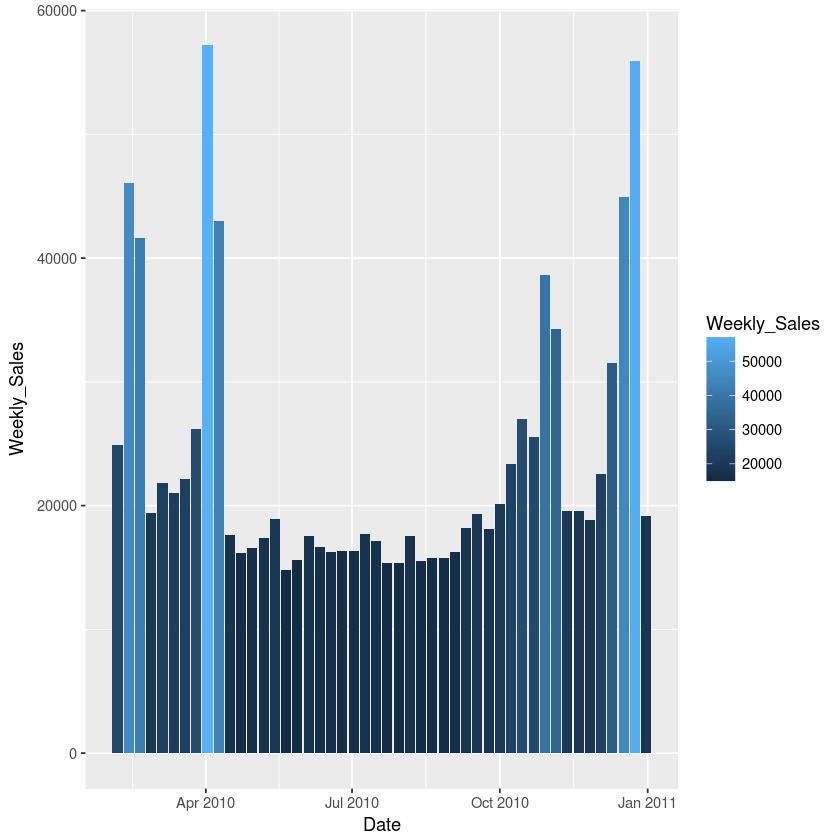

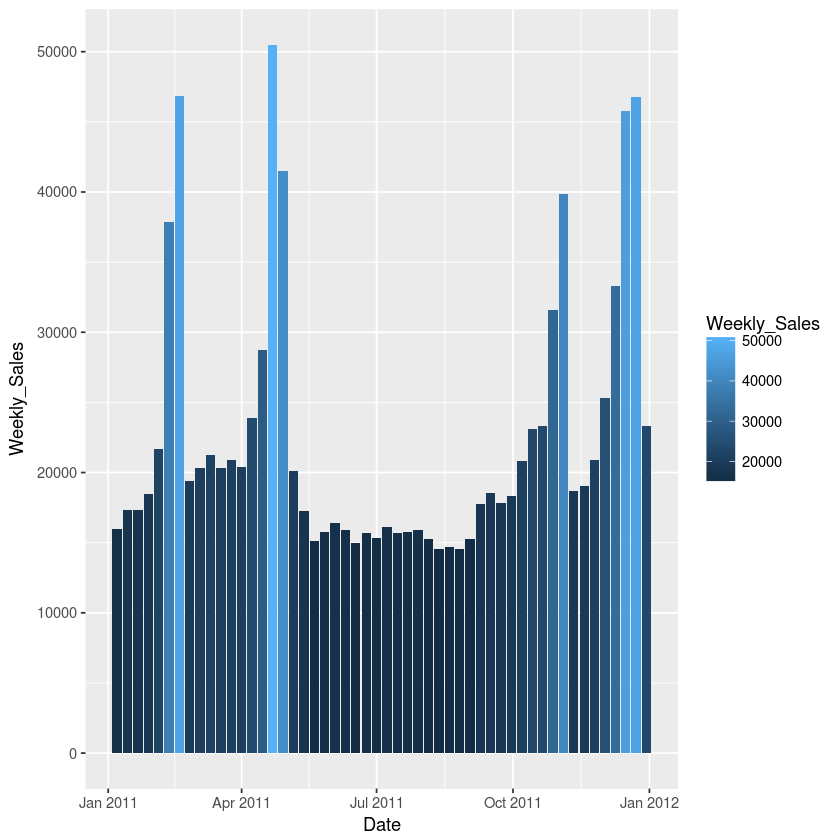

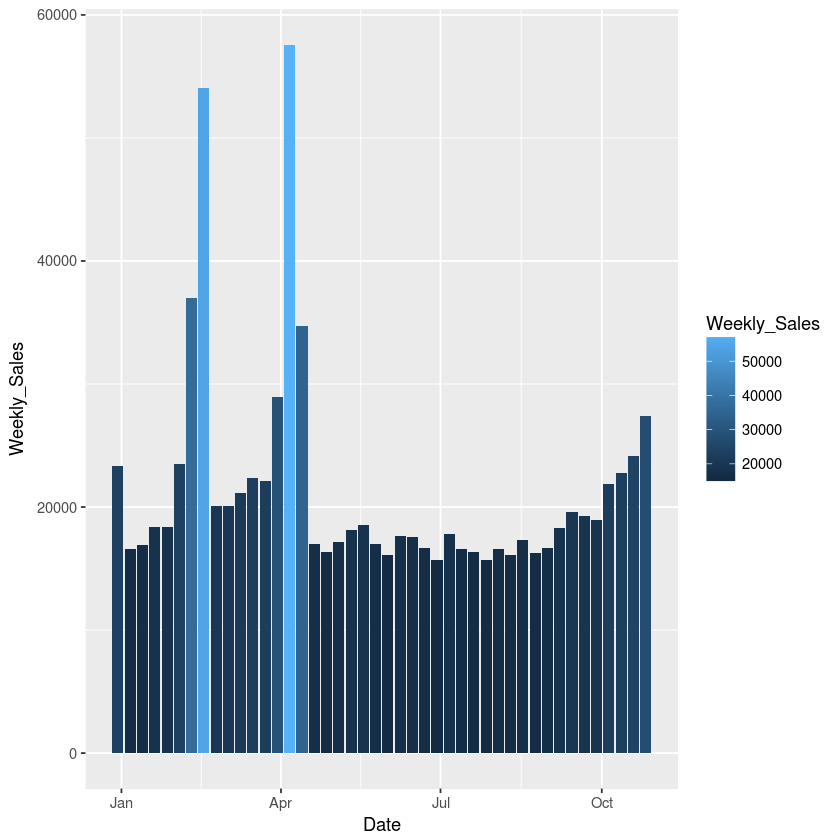

In [5]:
ggplot(data = dt[1:48,], aes(x=Date, y=Weekly_Sales, fill=Weekly_Sales)) + geom_bar(stat="identity")
ggplot(data = dt[49:100,], aes(x=Date, y=Weekly_Sales, fill=Weekly_Sales)) + geom_bar(stat="identity")
ggplot(data = dt[100:143,], aes(x=Date, y=Weekly_Sales, fill=Weekly_Sales)) + geom_bar(stat="identity")

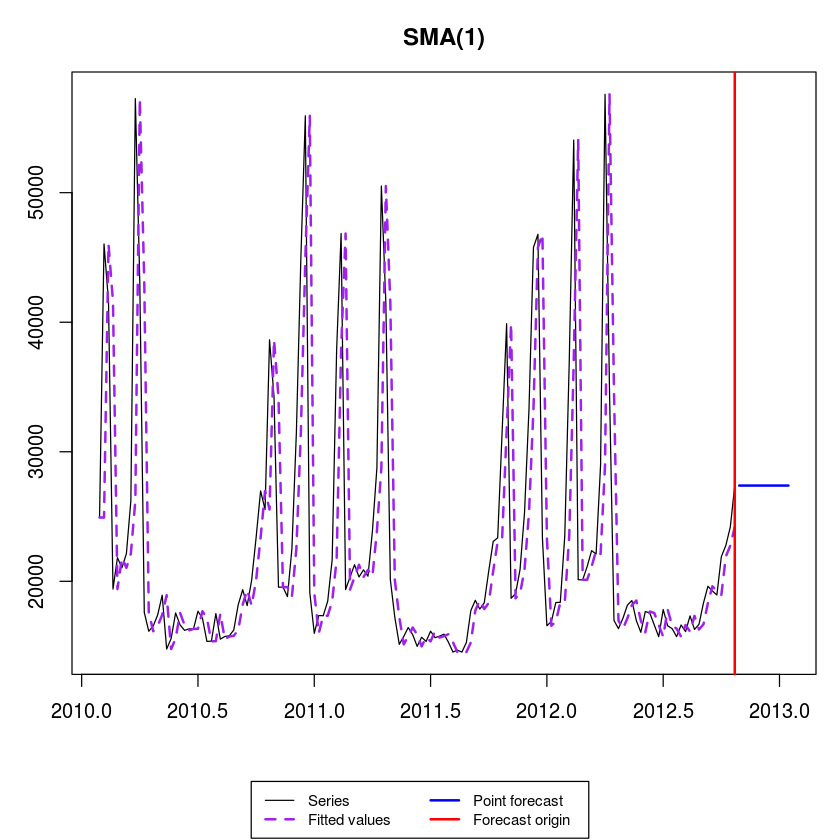

In [8]:
#convert data into time-series object
dt_s = ts(dt$Weekly_Sales, frequency = 52, start = c(2010, 5))
#Moving Average
fc.ma = sma(dt_s, h = 12)

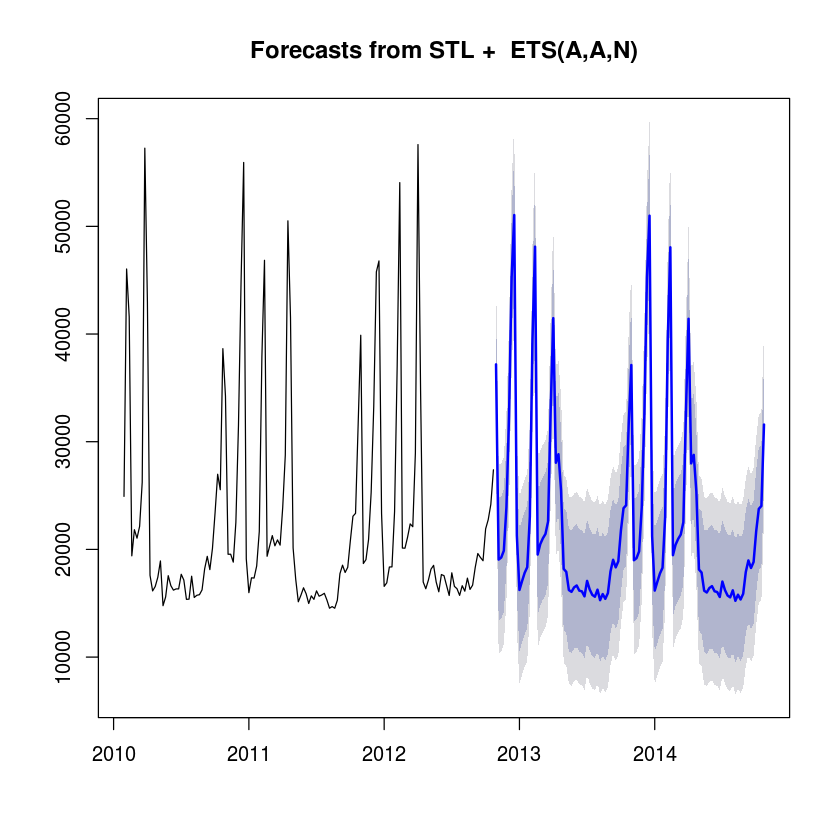

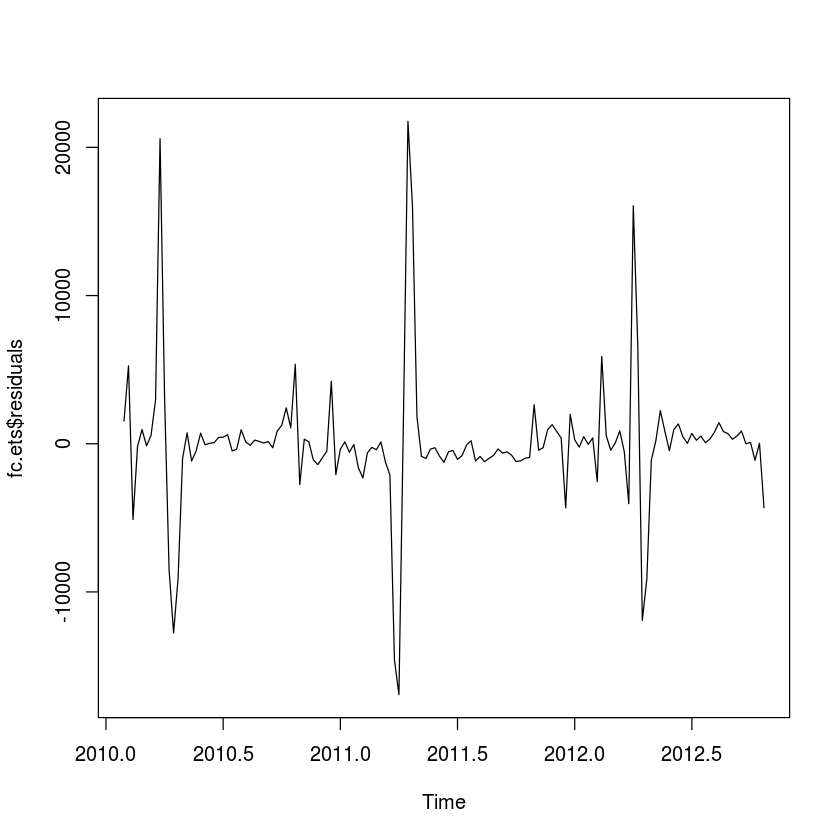

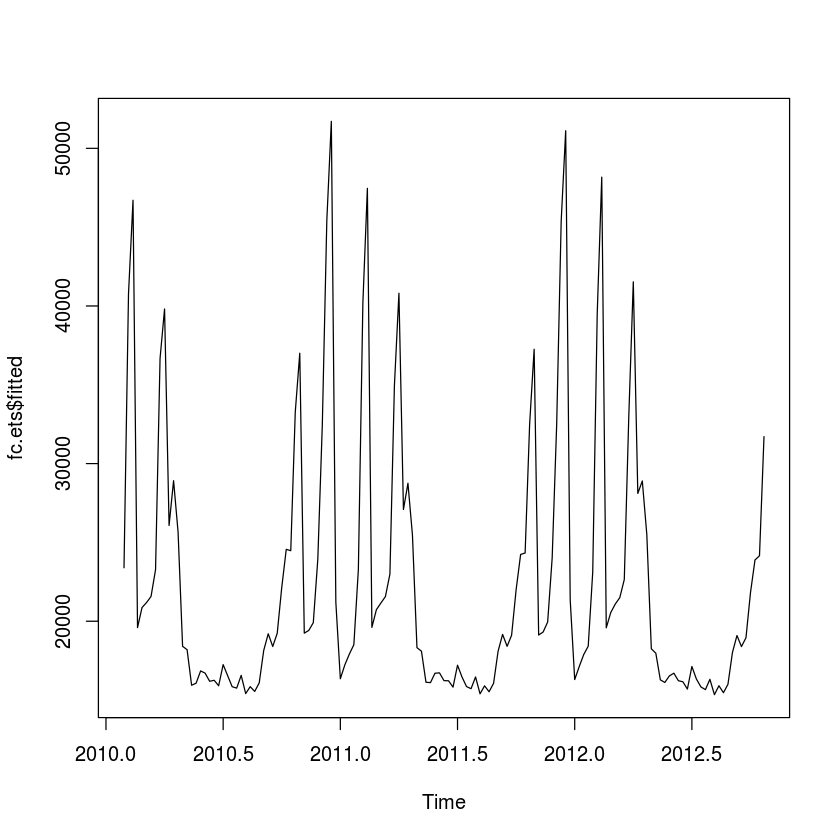

In [9]:
#ETS "Exponential Smoothing"
fc.ets = forecast(dt_s)
plot(fc.ets)
plot(fc.ets$residuals)
plot(fc.ets$fitted)

Series: dt_s 
ARIMA(0,0,1)(0,1,0)[52]                    

Coefficients:
         ma1
      0.6695
s.e.  0.0719

sigma^2 estimated as 52502546:  log likelihood=-937.74
AIC=1879.49   AICc=1879.62   BIC=1884.51

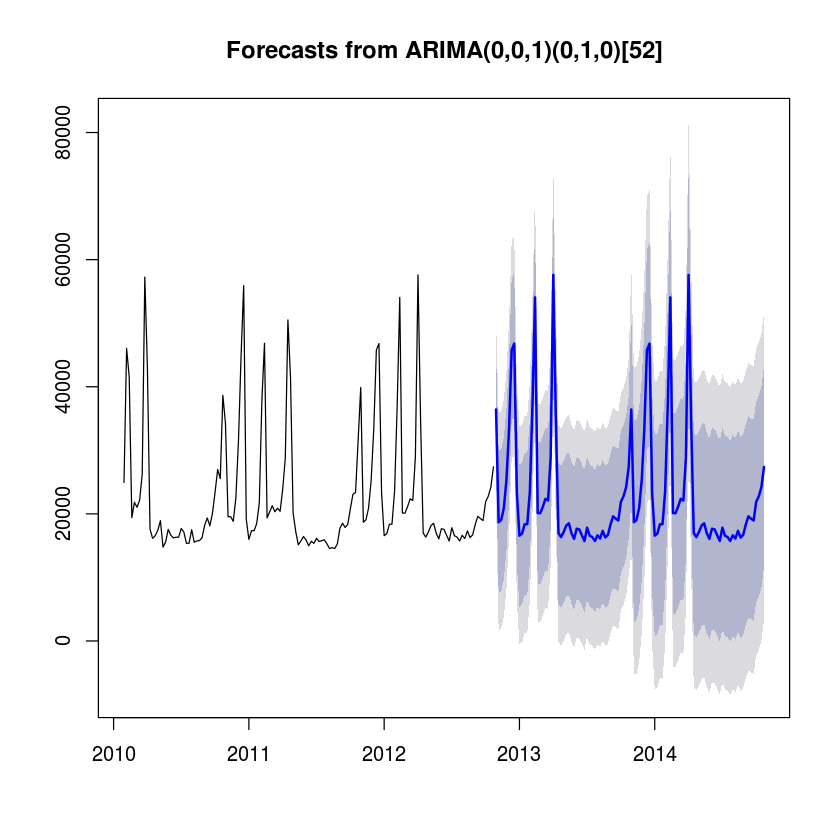

In [11]:
#ARIMA
ar = auto.arima(dt_s)
ar
fc.arima = forecast(ar)
plot(fc.arima)

In [12]:
accuracy(fc.ets)
accuracy(fc.arima)

,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,0.6934433,4440.788,2093.015,-2.239212,8.207728,0.5022576,0.373988


,ME,RMSE,MAE,MPE,MAPE,MASE,ACF1
Training set,-8.655693,5748.353,2431.66,-1.819204,9.799426,0.5835216,0.05599928


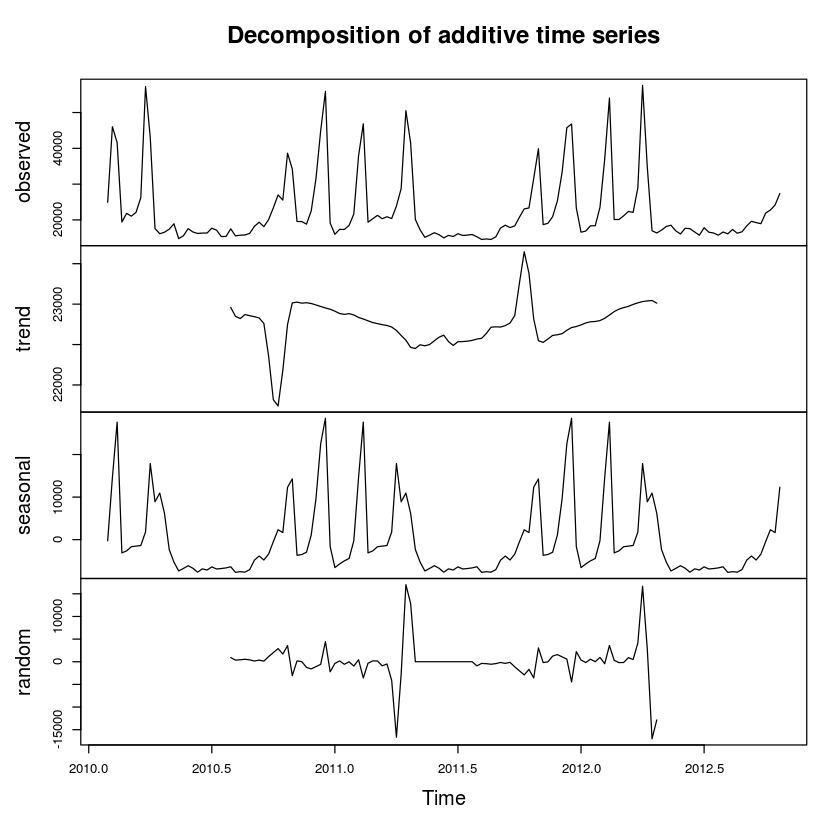

In [13]:
#Decompose the data into seasonal, trend and random
dt_dec <- decompose(dt_s)
plot(dt_dec)

In [14]:
#Deseasonalize data
dt_des = dt_s - dt_dec$seasonal

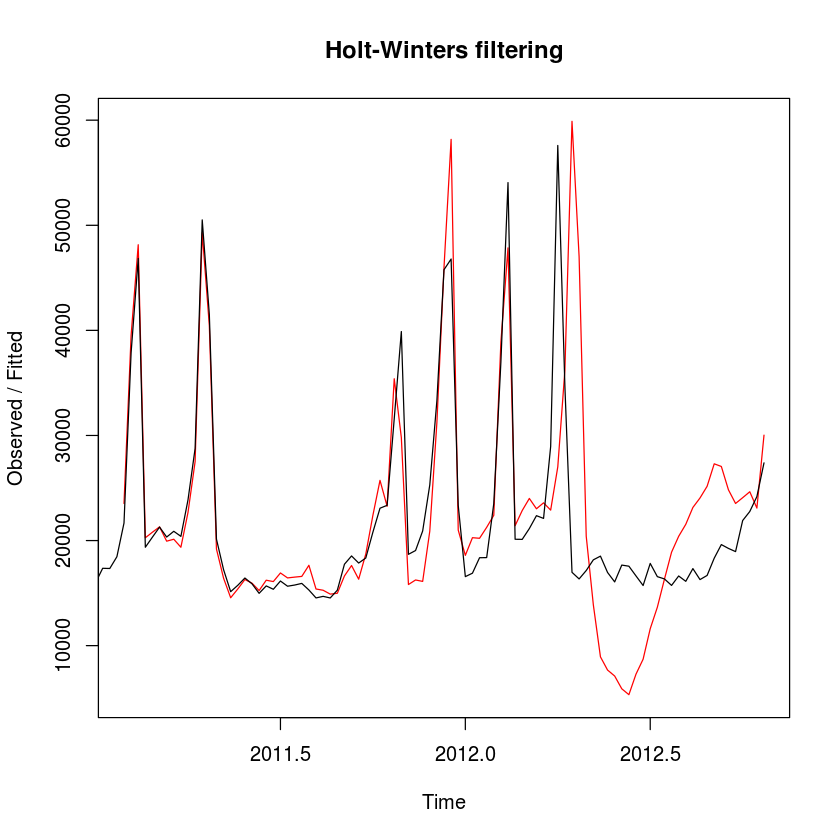

In [22]:
#Holt-Winters
f_SES = HoltWinters(dt_s, beta = TRUE, gamma = TRUE, l.start = dt_s)
plot(f_SES)

In [23]:
f_SES$SSE

[1] 5386051760